In [1]:
from classes import *
import SessionState
from sklearn.manifold import TSNE

# all plot with size = [20,16]
plt.rcParams['figure.figsize'] = [20, 16]

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
#p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features'] for i in range(0, p_sim['n_features'])]


idx = np.arange( p_sim['n_features'])
beta = (-1) ** idx * np.exp(-idx/ 10.)
beta_norm = np.linalg.norm(beta)
p_beta = 1.
p_sim['beta'] = p_beta * beta / beta_norm  #/10  (-1) ** idx * np.exp(-idx/10.)#
# select five 5 features
#p_sim['beta'] = np.array([0.1, -0.1, 0.1, -0.1, 0.1,0.1]+[0.]*(p_sim['n_features']-6))


p_sim['alpha'] = 2#1
p_sim['lamb'] = 1
p_sim['coef_tt'] = .8
p_sim['rho'] =1 # 0.2 #1
p_sim['kappa'] = 3.
p_sim['wd_param'] = 10. #4. # 40



p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10



In [3]:
nep = Neptune("test")
nep.create_experiment()
# send parameters to neptune
nep.send_dict(p_sim, "p_sim",num_run=0)
nep.experiment['beta'] = p_sim['beta']


2021-11-22 17:19:52.656 WARNING neptune.internal.hardware.gpu.gpu_monitor: Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/SurvCaus/RUNS/e/RUN-115
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [4]:
# sin(πXi1Xi2) + 2(Xi3 − 0.5)2 + Xi4 + 0.5Xi5
f1 = lambda x : np.sin(np.pi*x[:,0]*x[:,1] + 2*(x[:,2]-0.5)**2 + x[:,3] + 0.5*x[:,4])

# 2 log(1 + exp(Xi1+Xi2+Xi3 )
f2 = lambda x : np.log(1 + np.exp(x[:,0] + x[:,1] + x[:,2]))

#  (max{Xi1 + Xi2 + Xi3, 0} + max{Xi4 + Xi5, 0}) /2
f3 = lambda x : (np.maximum(x[:,0] + x[:,1] + x[:,2], 0) + np.maximum(x[:,3] + x[:,4], 0)) / 2

#  max{Xi1 + Xi2, Xi3, 0} + max{Xi4 + Xi5, 0}
f4 = lambda x : (np.maximum(x[:,0] + x[:,1], 0) - np.maximum(x[:,3] + x[:,4], 0))

f =  lambda x : (np.sin(x.dot(p_sim['beta'])))

p_sim['scheme'] = Scheme('nonlinear', f1)
#Scheme('linear') #Scheme('nonlinear',f4) # Scheme('nonlinear', f1)


In [5]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 0.42719892, -0.38654557,  0.34976089, -0.31647674,  0.28636   ,
         -0.25910924,  0.23445174, -0.2121407 ,  0.19195285, -0.17368612,
          0.1571577 , -0.14220217,  0.12866984, -0.11642529,  0.10534596,
         -0.09532096,  0.08624997, -0.0780422 ,  0.07061551, -0.06389555,
          0.05781509, -0.05231325,  0.04733499, -0.04283047,  0.03875461]),
  'alpha': 2,
  'lamb': 1,
  'coef_tt': 0.8,
  'rho': 1,
  'kappa': 3.0,
  'wd_param': 10.0,
  'path_data': './sim_surv',
  'scheme': <classes.Scheme at 0x7f362831c9a0>})

In [6]:
simu = SimulationNew(p_sim)
data = simu.simulation_surv()
# send data to neptune
nep.send_data(data, "data",num_run=0)
nep.experiment['Scheme'] = simu.sheme_type
nep.experiment['wd'] = simu.wd
nep.experiment['event=1'] = simu.perc_event
nep.experiment['tt=1']= simu.perc_treatement

WD =  19.943283081054688
tt = 1 : 49 % 
event = 1 : 72 %
Scheme :  nonlinear
Wd_para :  10.0


In [7]:
data#.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,0.472814,0.472814,0.472814,0.472814,0.472814,0.472814,0.472814,0.472814,0.472814,0.472814,...,0.472814,0.472814,0,0.283968,1,0.360995,0.283968,0.283968,0.360995,-0.330632
1,0.670904,0.670904,0.670904,0.670904,0.670904,0.670904,0.670904,0.670904,0.670904,0.670904,...,0.670904,0.670904,0,0.503032,0,0.364658,0.792871,0.792871,0.364658,0.039211
2,-0.715144,-0.715144,-0.715144,-0.715144,-0.715144,-0.715144,-0.715144,-0.715144,-0.715144,-0.715144,...,-0.715144,-0.715144,1,0.551842,1,0.551842,1.332045,0.551842,1.332045,-0.121809
3,-0.615209,-0.615209,-0.615209,-0.615209,-0.615209,-0.615209,-0.615209,-0.615209,-0.615209,-0.615209,...,-0.615209,-0.615209,1,0.509337,1,0.509337,0.988820,0.509337,0.988820,0.064775
4,-0.625442,-0.625442,-0.625442,-0.625442,-0.625442,-0.625442,-0.625442,-0.625442,-0.625442,-0.625442,...,-0.625442,-0.625442,1,1.260249,1,1.260249,1.058250,1.260249,1.058250,0.045667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.658528,-0.658528,-0.658528,-0.658528,-0.658528,-0.658528,-0.658528,-0.658528,-0.658528,-0.658528,...,-0.658528,-0.658528,1,0.445170,1,0.445170,1.029051,0.445170,1.029051,-0.016104
996,0.684090,0.684090,0.684090,0.684090,0.684090,0.684090,0.684090,0.684090,0.684090,0.684090,...,0.684090,0.684090,0,0.172813,1,0.315771,0.172813,0.172813,0.315771,0.063831
997,-0.754859,-0.754859,-0.754859,-0.754859,-0.754859,-0.754859,-0.754859,-0.754859,-0.754859,-0.754859,...,-0.754859,-0.754859,1,0.177738,0,0.562076,0.762930,0.562076,0.762930,-0.195959
998,-0.372782,-0.372782,-0.372782,-0.372782,-0.372782,-0.372782,-0.372782,-0.372782,-0.372782,-0.372782,...,-0.372782,-0.372782,1,0.148823,0,0.594712,0.820704,0.594712,0.820704,0.517396


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.043279
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.108398


2021-11-22 17:20:07.602 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-22 17:20:07.602 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


[t-SNE] KL divergence after 1000 iterations: 0.167922


<ipython-input-8-e7a54b1301e3>:15: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



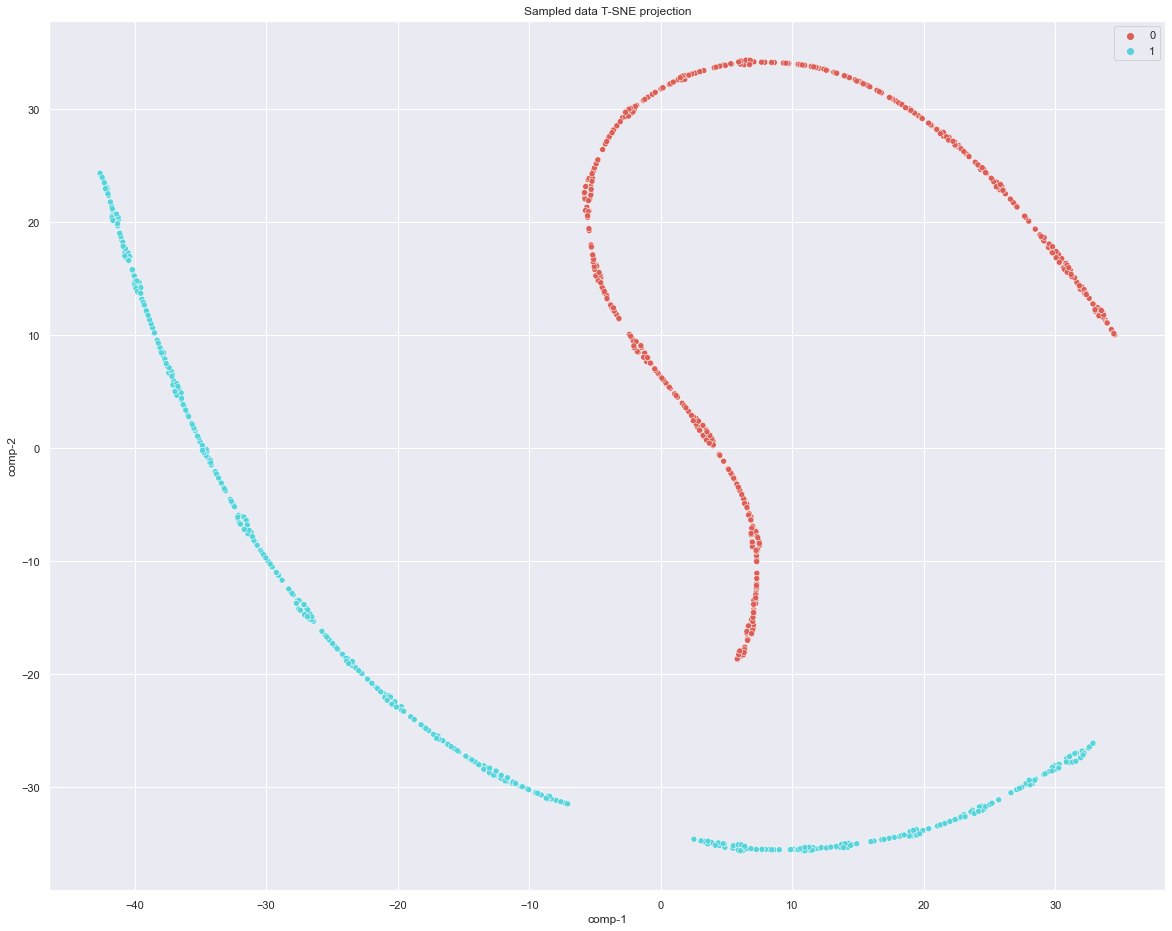

In [8]:
# TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()

# send figure to neptune
nep.send_plot(fig, "TSNE initial",num_run=0)


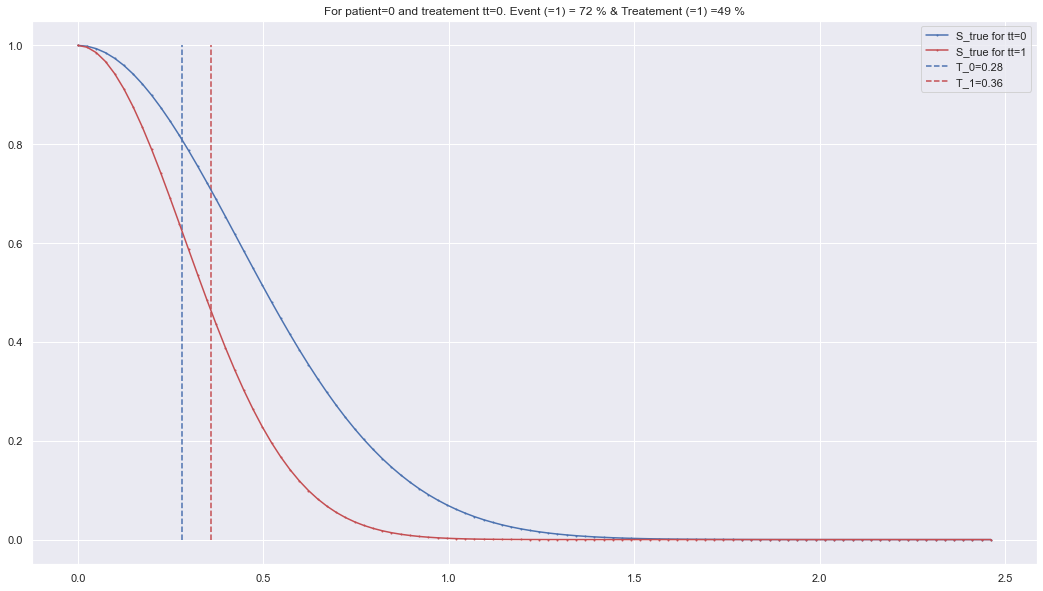

In [9]:
simu.plot_surv_true(patient=0)

# Tunning

In [10]:
#Tunning Survcaus 


tunning = Tunning(p_sim)
n_trials = 10
   
    
p_survcaus_best = tunning.get_best_hyperparameter_survcaus(n_trials=10)


[I 2021-11-22 17:20:08,531] A new study created in memory with name: no-name-75c4301c-1fae-4562-a0af-8970d3d3bb15


0:	[0s / 0s],		train_loss: 2.4892,	train_loss_surv: 2.4891,	train_loss_wass: 0.0006,	val_loss: 2.5233,	val_loss_surv: 2.5232,	val_loss_wass: 0.0005
1:	[0s / 0s],		train_loss: 2.4471,	train_loss_surv: 2.4471,	train_loss_wass: 0.0004,	val_loss: 2.5210,	val_loss_surv: 2.5209,	val_loss_wass: 0.0007
2:	[0s / 0s],		train_loss: 2.3893,	train_loss_surv: 2.3893,	train_loss_wass: 0.0006,	val_loss: 2.5186,	val_loss_surv: 2.5186,	val_loss_wass: 0.0008
3:	[0s / 0s],		train_loss: 2.3197,	train_loss_surv: 2.3197,	train_loss_wass: 0.0006,	val_loss: 2.5134,	val_loss_surv: 2.5134,	val_loss_wass: 0.0014
4:	[0s / 0s],		train_loss: 2.3497,	train_loss_surv: 2.3496,	train_loss_wass: 0.0008,	val_loss: 2.5075,	val_loss_surv: 2.5074,	val_loss_wass: 0.0017
5:	[0s / 0s],		train_loss: 2.3049,	train_loss_surv: 2.3048,	train_loss_wass: 0.0009,	val_loss: 2.5003,	val_loss_surv: 2.5002,	val_loss_wass: 0.0021
6:	[0s / 0s],		train_loss: 2.3234,	train_loss_surv: 2.3234,	train_loss_wass: 0.0010,	val_loss: 2.4935,	val_loss_

 21%|██        | 67/320 [00:00<00:00, 669.92it/s]

18:	[0s / 2s],		train_loss: 2.2528,	train_loss_surv: 2.2527,	train_loss_wass: 0.0008,	val_loss: 2.4869,	val_loss_surv: 2.4868,	val_loss_wass: 0.0017


100%|██████████| 320/320 [00:00<00:00, 862.65it/s]
[I 2021-11-22 17:20:11,832] Trial 0 finished with value: 0.06836966771759043 and parameters: {'num_durations': 25, 'encoded_features': 20, 'alpha_wass': 0.06723028367542534, 'lr': 0.0028827755214509256}. Best is trial 0 with value: 0.06836966771759043.


0:	[0s / 0s],		train_loss: 2.4969,	train_loss_surv: 2.4969,	train_loss_wass: 0.0002,	val_loss: 2.6084,	val_loss_surv: 2.6084,	val_loss_wass: 0.0005
1:	[0s / 0s],		train_loss: 2.4760,	train_loss_surv: 2.4760,	train_loss_wass: 0.0001,	val_loss: 2.6086,	val_loss_surv: 2.6086,	val_loss_wass: 0.0005
2:	[0s / 0s],		train_loss: 2.5095,	train_loss_surv: 2.5095,	train_loss_wass: 0.0001,	val_loss: 2.6092,	val_loss_surv: 2.6092,	val_loss_wass: 0.0006


 14%|█▍        | 44/320 [00:00<00:00, 438.18it/s]

3:	[0s / 0s],		train_loss: 2.4301,	train_loss_surv: 2.4301,	train_loss_wass: 0.0001,	val_loss: 2.6099,	val_loss_surv: 2.6099,	val_loss_wass: 0.0006
4:	[0s / 0s],		train_loss: 2.4567,	train_loss_surv: 2.4567,	train_loss_wass: 0.0001,	val_loss: 2.6105,	val_loss_surv: 2.6105,	val_loss_wass: 0.0006


100%|██████████| 320/320 [00:00<00:00, 566.94it/s]
[I 2021-11-22 17:20:13,025] Trial 1 finished with value: 0.0961859082076003 and parameters: {'num_durations': 26, 'encoded_features': 12, 'alpha_wass': 0.042606689681486634, 'lr': 0.0007506818342521823}. Best is trial 0 with value: 0.06836966771759043.


0:	[0s / 0s],		train_loss: 2.6184,	train_loss_surv: 2.6184,	train_loss_wass: 0.0003,	val_loss: 2.6279,	val_loss_surv: 2.6279,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.5509,	train_loss_surv: 2.5509,	train_loss_wass: 0.0002,	val_loss: 2.6262,	val_loss_surv: 2.6262,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.5243,	train_loss_surv: 2.5243,	train_loss_wass: 0.0001,	val_loss: 2.6229,	val_loss_surv: 2.6229,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.5574,	train_loss_surv: 2.5574,	train_loss_wass: 0.0003,	val_loss: 2.6201,	val_loss_surv: 2.6201,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.5344,	train_loss_surv: 2.5344,	train_loss_wass: 0.0002,	val_loss: 2.6176,	val_loss_surv: 2.6176,	val_loss_wass: 0.0004
5:	[0s / 0s],		train_loss: 2.4931,	train_loss_surv: 2.4931,	train_loss_wass: 0.0003,	val_loss: 2.6149,	val_loss_surv: 2.6149,	val_loss_wass: 0.0004
6:	[0s / 0s],		train_loss: 2.5075,	train_loss_surv: 2.5075,	train_loss_wass: 0.0004,	val_loss: 2.6126,	val_loss_

 20%|█▉        | 63/320 [00:00<00:00, 625.98it/s]

19:	[0s / 1s],		train_loss: 2.4084,	train_loss_surv: 2.4084,	train_loss_wass: 0.0009,	val_loss: 2.5853,	val_loss_surv: 2.5853,	val_loss_wass: 0.0009


100%|██████████| 320/320 [00:00<00:00, 670.88it/s]
[I 2021-11-22 17:20:15,510] Trial 2 finished with value: 0.07626800833416471 and parameters: {'num_durations': 30, 'encoded_features': 22, 'alpha_wass': 0.020631135868923723, 'lr': 0.0008252140686267187}. Best is trial 0 with value: 0.06836966771759043.


0:	[0s / 0s],		train_loss: 2.5769,	train_loss_surv: 2.5769,	train_loss_wass: 0.0001,	val_loss: 2.5916,	val_loss_surv: 2.5915,	val_loss_wass: 0.0010
1:	[0s / 0s],		train_loss: 2.5374,	train_loss_surv: 2.5374,	train_loss_wass: 0.0001,	val_loss: 2.5905,	val_loss_surv: 2.5904,	val_loss_wass: 0.0010
2:	[0s / 0s],		train_loss: 2.4173,	train_loss_surv: 2.4173,	train_loss_wass: 0.0005,	val_loss: 2.5884,	val_loss_surv: 2.5883,	val_loss_wass: 0.0010
3:	[0s / 0s],		train_loss: 2.4977,	train_loss_surv: 2.4977,	train_loss_wass: 0.0005,	val_loss: 2.5862,	val_loss_surv: 2.5862,	val_loss_wass: 0.0010
4:	[0s / 0s],		train_loss: 2.4531,	train_loss_surv: 2.4531,	train_loss_wass: 0.0002,	val_loss: 2.5842,	val_loss_surv: 2.5842,	val_loss_wass: 0.0010
5:	[0s / 0s],		train_loss: 2.4262,	train_loss_surv: 2.4262,	train_loss_wass: 0.0003,	val_loss: 2.5810,	val_loss_surv: 2.5809,	val_loss_wass: 0.0010
6:	[0s / 0s],		train_loss: 2.3875,	train_loss_surv: 2.3875,	train_loss_wass: 0.0001,	val_loss: 2.5772,	val_loss_

 24%|██▍       | 78/320 [00:00<00:00, 773.26it/s]

18:	[0s / 1s],		train_loss: 2.3867,	train_loss_surv: 2.3867,	train_loss_wass: 0.0002,	val_loss: 2.5094,	val_loss_surv: 2.5093,	val_loss_wass: 0.0012
19:	[0s / 1s],		train_loss: 2.3863,	train_loss_surv: 2.3863,	train_loss_wass: 0.0002,	val_loss: 2.5250,	val_loss_surv: 2.5249,	val_loss_wass: 0.0012


100%|██████████| 320/320 [00:00<00:00, 753.90it/s]
[I 2021-11-22 17:20:17,828] Trial 3 finished with value: 0.0734874360634465 and parameters: {'num_durations': 28, 'encoded_features': 18, 'alpha_wass': 0.03613235844278092, 'lr': 0.0013304417597551934}. Best is trial 0 with value: 0.06836966771759043.


0:	[0s / 0s],		train_loss: 2.5453,	train_loss_surv: 2.5453,	train_loss_wass: 0.0003,	val_loss: 2.6451,	val_loss_surv: 2.6451,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.5165,	train_loss_surv: 2.5164,	train_loss_wass: 0.0002,	val_loss: 2.6456,	val_loss_surv: 2.6456,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.4998,	train_loss_surv: 2.4998,	train_loss_wass: 0.0004,	val_loss: 2.6457,	val_loss_surv: 2.6457,	val_loss_wass: 0.0003


 22%|██▏       | 70/320 [00:00<00:00, 690.14it/s]

3:	[0s / 0s],		train_loss: 2.4635,	train_loss_surv: 2.4635,	train_loss_wass: 0.0001,	val_loss: 2.6461,	val_loss_surv: 2.6461,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.5109,	train_loss_surv: 2.5109,	train_loss_wass: 0.0002,	val_loss: 2.6468,	val_loss_surv: 2.6468,	val_loss_wass: 0.0003


100%|██████████| 320/320 [00:00<00:00, 711.03it/s]
[I 2021-11-22 17:20:18,809] Trial 4 finished with value: 0.09509168878917533 and parameters: {'num_durations': 27, 'encoded_features': 19, 'alpha_wass': 0.013100220617864013, 'lr': 0.00038528213833548974}. Best is trial 0 with value: 0.06836966771759043.


0:	[0s / 0s],		train_loss: 2.4288,	train_loss_surv: 2.4288,	train_loss_wass: 0.0003,	val_loss: 2.3818,	val_loss_surv: 2.3817,	val_loss_wass: 0.0011
1:	[0s / 0s],		train_loss: 2.3885,	train_loss_surv: 2.3885,	train_loss_wass: 0.0005,	val_loss: 2.3808,	val_loss_surv: 2.3808,	val_loss_wass: 0.0011
2:	[0s / 0s],		train_loss: 2.4040,	train_loss_surv: 2.4040,	train_loss_wass: 0.0002,	val_loss: 2.3802,	val_loss_surv: 2.3802,	val_loss_wass: 0.0011
3:	[0s / 0s],		train_loss: 2.4014,	train_loss_surv: 2.4014,	train_loss_wass: 0.0002,	val_loss: 2.3798,	val_loss_surv: 2.3798,	val_loss_wass: 0.0011
4:	[0s / 0s],		train_loss: 2.4160,	train_loss_surv: 2.4160,	train_loss_wass: 0.0004,	val_loss: 2.3793,	val_loss_surv: 2.3793,	val_loss_wass: 0.0011
5:	[0s / 0s],		train_loss: 2.3735,	train_loss_surv: 2.3735,	train_loss_wass: 0.0004,	val_loss: 2.3789,	val_loss_surv: 2.3789,	val_loss_wass: 0.0011
6:	[0s / 0s],		train_loss: 2.3628,	train_loss_surv: 2.3628,	train_loss_wass: 0.0002,	val_loss: 2.3784,	val_loss_

 21%|██▏       | 68/320 [00:00<00:00, 675.26it/s]

18:	[0s / 1s],		train_loss: 2.3527,	train_loss_surv: 2.3527,	train_loss_wass: 0.0002,	val_loss: 2.3633,	val_loss_surv: 2.3632,	val_loss_wass: 0.0012
19:	[0s / 1s],		train_loss: 2.3673,	train_loss_surv: 2.3673,	train_loss_wass: 0.0002,	val_loss: 2.3605,	val_loss_surv: 2.3605,	val_loss_wass: 0.0011


100%|██████████| 320/320 [00:00<00:00, 661.47it/s]
[I 2021-11-22 17:20:20,925] Trial 5 finished with value: 0.09062895881041916 and parameters: {'num_durations': 24, 'encoded_features': 18, 'alpha_wass': 0.017019669719008087, 'lr': 0.000185160274691549}. Best is trial 0 with value: 0.06836966771759043.


0:	[0s / 0s],		train_loss: 2.5861,	train_loss_surv: 2.5860,	train_loss_wass: 0.0005,	val_loss: 2.6116,	val_loss_surv: 2.6116,	val_loss_wass: 0.0007
1:	[0s / 0s],		train_loss: 2.5658,	train_loss_surv: 2.5658,	train_loss_wass: 0.0006,	val_loss: 2.6101,	val_loss_surv: 2.6101,	val_loss_wass: 0.0014
2:	[0s / 0s],		train_loss: 2.5756,	train_loss_surv: 2.5756,	train_loss_wass: 0.0008,	val_loss: 2.6089,	val_loss_surv: 2.6089,	val_loss_wass: 0.0018
3:	[0s / 0s],		train_loss: 2.4391,	train_loss_surv: 2.4391,	train_loss_wass: 0.0010,	val_loss: 2.6068,	val_loss_surv: 2.6068,	val_loss_wass: 0.0019
4:	[0s / 0s],		train_loss: 2.5309,	train_loss_surv: 2.5309,	train_loss_wass: 0.0015,	val_loss: 2.6064,	val_loss_surv: 2.6063,	val_loss_wass: 0.0020
5:	[0s / 0s],		train_loss: 2.4365,	train_loss_surv: 2.4365,	train_loss_wass: 0.0012,	val_loss: 2.6056,	val_loss_surv: 2.6056,	val_loss_wass: 0.0020
6:	[0s / 0s],		train_loss: 2.4173,	train_loss_surv: 2.4173,	train_loss_wass: 0.0013,	val_loss: 2.6062,	val_loss_

 22%|██▏       | 70/320 [00:00<00:00, 691.50it/s]

9:	[0s / 0s],		train_loss: 2.3670,	train_loss_surv: 2.3670,	train_loss_wass: 0.0013,	val_loss: 2.6096,	val_loss_surv: 2.6096,	val_loss_wass: 0.0026


100%|██████████| 320/320 [00:00<00:00, 717.78it/s]
[I 2021-11-22 17:20:22,483] Trial 6 finished with value: 0.0892748520955099 and parameters: {'num_durations': 30, 'encoded_features': 19, 'alpha_wass': 0.016309387070502696, 'lr': 0.002594623877261881}. Best is trial 0 with value: 0.06836966771759043.


0:	[0s / 0s],		train_loss: 2.5876,	train_loss_surv: 2.5876,	train_loss_wass: 0.0002,	val_loss: 2.5042,	val_loss_surv: 2.5042,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.5467,	train_loss_surv: 2.5467,	train_loss_wass: 0.0002,	val_loss: 2.5045,	val_loss_surv: 2.5045,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.5306,	train_loss_surv: 2.5306,	train_loss_wass: 0.0001,	val_loss: 2.5032,	val_loss_surv: 2.5032,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.5127,	train_loss_surv: 2.5127,	train_loss_wass: 0.0002,	val_loss: 2.5024,	val_loss_surv: 2.5024,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.5074,	train_loss_surv: 2.5074,	train_loss_wass: 0.0003,	val_loss: 2.5021,	val_loss_surv: 2.5020,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.4221,	train_loss_surv: 2.4221,	train_loss_wass: 0.0002,	val_loss: 2.5017,	val_loss_surv: 2.5017,	val_loss_wass: 0.0004
6:	[0s / 0s],		train_loss: 2.5511,	train_loss_surv: 2.5511,	train_loss_wass: 0.0002,	val_loss: 2.5011,	val_loss_

  0%|          | 0/320 [00:00<?, ?it/s]

17:	[0s / 1s],		train_loss: 2.4321,	train_loss_surv: 2.4321,	train_loss_wass: 0.0006,	val_loss: 2.4773,	val_loss_surv: 2.4773,	val_loss_wass: 0.0010
18:	[0s / 1s],		train_loss: 2.4180,	train_loss_surv: 2.4179,	train_loss_wass: 0.0005,	val_loss: 2.4772,	val_loss_surv: 2.4771,	val_loss_wass: 0.0010
19:	[0s / 1s],		train_loss: 2.3963,	train_loss_surv: 2.3963,	train_loss_wass: 0.0005,	val_loss: 2.4782,	val_loss_surv: 2.4781,	val_loss_wass: 0.0010


100%|██████████| 320/320 [00:00<00:00, 698.28it/s]
[I 2021-11-22 17:20:24,410] Trial 7 finished with value: 0.0746731640027611 and parameters: {'num_durations': 29, 'encoded_features': 13, 'alpha_wass': 0.054077244219051065, 'lr': 0.0006220569750884118}. Best is trial 0 with value: 0.06836966771759043.


0:	[0s / 0s],		train_loss: 2.5280,	train_loss_surv: 2.5280,	train_loss_wass: 0.0002,	val_loss: 2.8216,	val_loss_surv: 2.8216,	val_loss_wass: 0.0004
1:	[0s / 0s],		train_loss: 2.5423,	train_loss_surv: 2.5423,	train_loss_wass: 0.0002,	val_loss: 2.8214,	val_loss_surv: 2.8214,	val_loss_wass: 0.0004
2:	[0s / 0s],		train_loss: 2.4791,	train_loss_surv: 2.4791,	train_loss_wass: 0.0002,	val_loss: 2.8207,	val_loss_surv: 2.8207,	val_loss_wass: 0.0004
3:	[0s / 0s],		train_loss: 2.4502,	train_loss_surv: 2.4502,	train_loss_wass: 0.0003,	val_loss: 2.8195,	val_loss_surv: 2.8195,	val_loss_wass: 0.0004
4:	[0s / 0s],		train_loss: 2.5353,	train_loss_surv: 2.5353,	train_loss_wass: 0.0002,	val_loss: 2.8184,	val_loss_surv: 2.8184,	val_loss_wass: 0.0005
5:	[0s / 0s],		train_loss: 2.4898,	train_loss_surv: 2.4898,	train_loss_wass: 0.0003,	val_loss: 2.8173,	val_loss_surv: 2.8173,	val_loss_wass: 0.0005
6:	[0s / 0s],		train_loss: 2.4958,	train_loss_surv: 2.4958,	train_loss_wass: 0.0004,	val_loss: 2.8162,	val_loss_

 27%|██▋       | 85/320 [00:00<00:00, 841.32it/s]

18:	[0s / 1s],		train_loss: 2.4750,	train_loss_surv: 2.4750,	train_loss_wass: 0.0004,	val_loss: 2.7925,	val_loss_surv: 2.7924,	val_loss_wass: 0.0007
19:	[0s / 1s],		train_loss: 2.4139,	train_loss_surv: 2.4138,	train_loss_wass: 0.0003,	val_loss: 2.7897,	val_loss_surv: 2.7896,	val_loss_wass: 0.0007


100%|██████████| 320/320 [00:00<00:00, 881.05it/s]
[I 2021-11-22 17:20:26,328] Trial 8 finished with value: 0.08553407722164981 and parameters: {'num_durations': 28, 'encoded_features': 13, 'alpha_wass': 0.0503919854411161, 'lr': 0.0002900498178583714}. Best is trial 0 with value: 0.06836966771759043.


0:	[0s / 0s],		train_loss: 2.4055,	train_loss_surv: 2.4055,	train_loss_wass: 0.0011,	val_loss: 2.4358,	val_loss_surv: 2.4356,	val_loss_wass: 0.0051
1:	[0s / 0s],		train_loss: 2.3086,	train_loss_surv: 2.3085,	train_loss_wass: 0.0026,	val_loss: 2.4301,	val_loss_surv: 2.4297,	val_loss_wass: 0.0104
2:	[0s / 0s],		train_loss: 2.3502,	train_loss_surv: 2.3501,	train_loss_wass: 0.0040,	val_loss: 2.4305,	val_loss_surv: 2.4298,	val_loss_wass: 0.0179
3:	[1s / 1s],		train_loss: 2.3368,	train_loss_surv: 2.3364,	train_loss_wass: 0.0084,	val_loss: 2.4443,	val_loss_surv: 2.4433,	val_loss_wass: 0.0267
4:	[1s / 3s],		train_loss: 2.3157,	train_loss_surv: 2.3152,	train_loss_wass: 0.0103,	val_loss: 2.4607,	val_loss_surv: 2.4595,	val_loss_wass: 0.0292


 27%|██▋       | 87/320 [00:00<00:00, 864.02it/s]

5:	[0s / 4s],		train_loss: 2.2380,	train_loss_surv: 2.2376,	train_loss_wass: 0.0082,	val_loss: 2.4743,	val_loss_surv: 2.4730,	val_loss_wass: 0.0306


100%|██████████| 320/320 [00:00<00:00, 803.67it/s]
[I 2021-11-22 17:20:31,113] Trial 9 finished with value: 0.09494435856542342 and parameters: {'num_durations': 24, 'encoded_features': 30, 'alpha_wass': 0.04064668138859736, 'lr': 0.007045373276254802}. Best is trial 0 with value: 0.06836966771759043.


In [11]:
# Tunning BART 

p_bart_best = tunning.get_best_hyperparameter_bart(n_trials=1)
            

[I 2021-11-22 17:20:31,138] A new study created in memory with name: no-name-6bf80824-80bc-497d-8c2a-2e988e2a7104
100%|██████████| 320/320 [00:03<00:00, 102.64it/s]
[I 2021-11-22 17:20:34,827] Trial 0 finished with value: 0.0580785874620319 and parameters: {'num_trees': 20, 'max_features': 'all', 'max_depth': 5, 'alpha': 0.06629704775207139}. Best is trial 0 with value: 0.0580785874620319.


# Training 

In [12]:

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 2
p_survcaus['epochs'] = 20
p_survcaus['batch_size'] = 256
p_survcaus['num_durations'] = 25 #20
p_survcaus['encoded_features'] =12
    
print("Best hyperparameter for survcaus : ", p_survcaus)
print("Best hyperparameter for BART : ", p_bart_best)
    
Ev = Evaluation(p_sim, p_survcaus)


list_models =  ["SurvCaus", "SurvCaus_0",'BART', 'CoxPH','DeepSurv','EST','RSF']
print("Choosed models : ", list_models)

nep.send_dict(p_survcaus, "p_survcaus",num_run=0)
nep.send_dict(p_bart_best, "p_bart_best",num_run=0)

Best hyperparameter for survcaus :  {'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.06723028367542534, 'lr': 0.0028827755214509256, 'patience': 2, 'epochs': 20, 'batch_size': 256}
Best hyperparameter for BART :  {'num_trees': 20, 'max_features': 'all', 'max_depth': 5, 'alpha': 0.06629704775207139}
Choosed models :  ['SurvCaus', 'SurvCaus_0', 'BART', 'CoxPH', 'DeepSurv', 'EST', 'RSF']


SurvCaus
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.06723028367542534, 'lr': 0.0028827755214509256, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4845,	train_loss_surv: 2.4845,	train_loss_wass: 0.0001,	val_loss: 2.5429,	val_loss_surv: 2.5429,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.3880,	train_loss_surv: 2.3880,	train_loss_wass: 0.0003,	val_loss: 2.5416,	val_loss_surv: 2.5416,	val_loss_wass: 0.0004
2:	[0s / 0s],		train_loss: 2.3764,	train_loss_surv: 2.3764,	train_loss_wass: 0.0002,	val_loss: 2.5406,	val_loss_surv: 2.5406,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.3712,	train_loss_surv: 2.3711,	train_loss_wass: 0.0001,	val_loss: 2.5406,	val_loss_surv: 2.5406,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.3135,	train_loss_surv: 2.3135,	train_loss_wass: 0.0001,	val_loss: 2.5393,	val_loss_surv: 2.5393,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.3498,	train_loss_surv: 2.3498,	train_loss_wass: 0.0003,	val_loss

 19%|█▉        | 61/320 [00:00<00:00, 608.48it/s]

13:	[0s / 1s],		train_loss: 2.2713,	train_loss_surv: 2.2712,	train_loss_wass: 0.0002,	val_loss: 2.5112,	val_loss_surv: 2.5112,	val_loss_wass: 0.0005


100%|██████████| 320/320 [00:00<00:00, 634.80it/s]


SurvCaus_0
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.0, 'lr': 0.0028827755214509256, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4242,	train_loss_surv: 2.4242,	train_loss_wass: 0.0002,	val_loss: 2.6246,	val_loss_surv: 2.6246,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.4072,	train_loss_surv: 2.4072,	train_loss_wass: 0.0003,	val_loss: 2.6213,	val_loss_surv: 2.6213,	val_loss_wass: 0.0006
2:	[0s / 0s],		train_loss: 2.4337,	train_loss_surv: 2.4337,	train_loss_wass: 0.0003,	val_loss: 2.6180,	val_loss_surv: 2.6180,	val_loss_wass: 0.0005
3:	[0s / 0s],		train_loss: 2.3637,	train_loss_surv: 2.3637,	train_loss_wass: 0.0004,	val_loss: 2.6149,	val_loss_surv: 2.6149,	val_loss_wass: 0.0005
4:	[0s / 0s],		train_loss: 2.3263,	train_loss_surv: 2.3263,	train_loss_wass: 0.0002,	val_loss: 2.6132,	val_loss_surv: 2.6132,	val_loss_wass: 0.0005
5:	[0s / 0s],		train_loss: 2.3060,	train_loss_surv: 2.3060,	train_loss_wass: 0.0004,	val_loss: 2.6111,	val_

 17%|█▋        | 53/320 [00:00<00:00, 527.96it/s]

8:	[0s / 0s],		train_loss: 2.3010,	train_loss_surv: 2.3010,	train_loss_wass: 0.0004,	val_loss: 2.6216,	val_loss_surv: 2.6216,	val_loss_wass: 0.0006


100%|██████████| 320/320 [00:00<00:00, 717.09it/s]


BART


100%|██████████| 320/320 [00:00<00:00, 334.50it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 899.368 - ||grad||^2 = 202.69392
 * Iteration #2 - Loss = 898.589 - ||grad||^2 = 182.41603
 * Iteration #3 - Loss = 897.958 - ||grad||^2 = 164.16916
 * Iteration #4 - Loss = 897.448 - ||grad||^2 = 147.74913
 * Iteration #5 - Loss = 897.035 - ||grad||^2 = 132.97254
 * Iteration #6 - Loss = 896.700 - ||grad||^2 = 119.67453
 * Iteration #7 - Loss = 896.429 - ||grad||^2 = 107.70691
 * Iteration #8 - Loss = 896.209 - ||grad||^2 = 96.93639
 * Iteration #9 - Loss = 896.031 - ||grad||^2 = 87.24313
 * Iteration #10 - Loss = 895.887 - ||grad||^2 = 78.51929
 * Iteration #11 - Loss = 895.770 - ||grad||^2 = 70.66786
 * Iteration #12 - Loss = 895.676 - ||grad||^2 = 63.60157
 * Iteration #13 - Loss = 895.599 - ||grad||^2 = 57.24188
 * Iteration #14 - Loss = 895.537 - ||grad||^2 = 51.51812
 * Iteration #15 - Loss = 895.487 - ||grad||^2 = 46.36668
 * Iteration #16 - Loss = 895.446 - ||grad||^2 = 41.73034
 * Iteration #17 - Loss = 895

  0%|          | 0/320 [00:00<?, ?it/s]2021-11-22 17:20:53.637 INFO    numba.core.transforms: finding looplift candidates


 * Iteration #102 - Loss = 1025.032 - ||grad||^2 = 0.00909
Converged after 102 iterations.


100%|██████████| 320/320 [00:01<00:00, 161.23it/s]


DeepSurv




100%|██████████| 320/320 [00:00<00:00, 573.07it/s]


EST


100%|██████████| 320/320 [00:00<00:00, 462.41it/s]


RSF


100%|██████████| 320/320 [00:00<00:00, 655.20it/s]


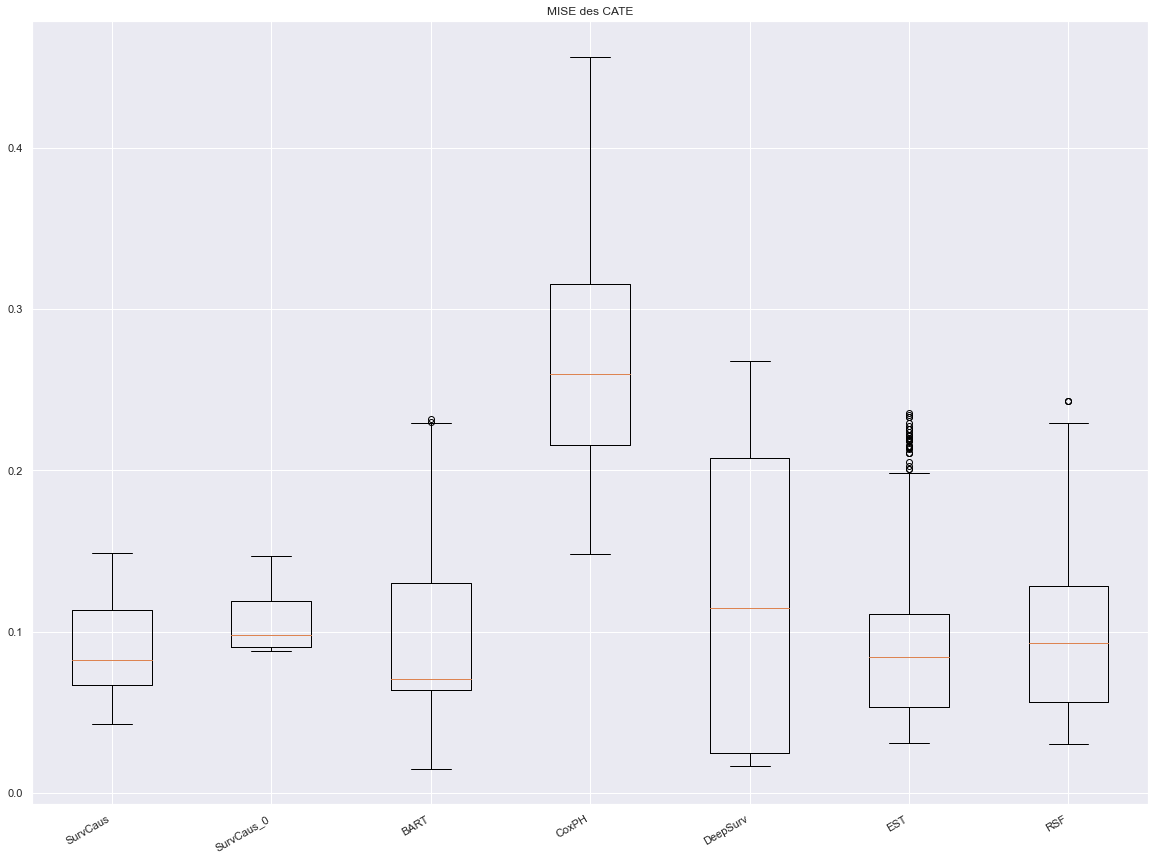

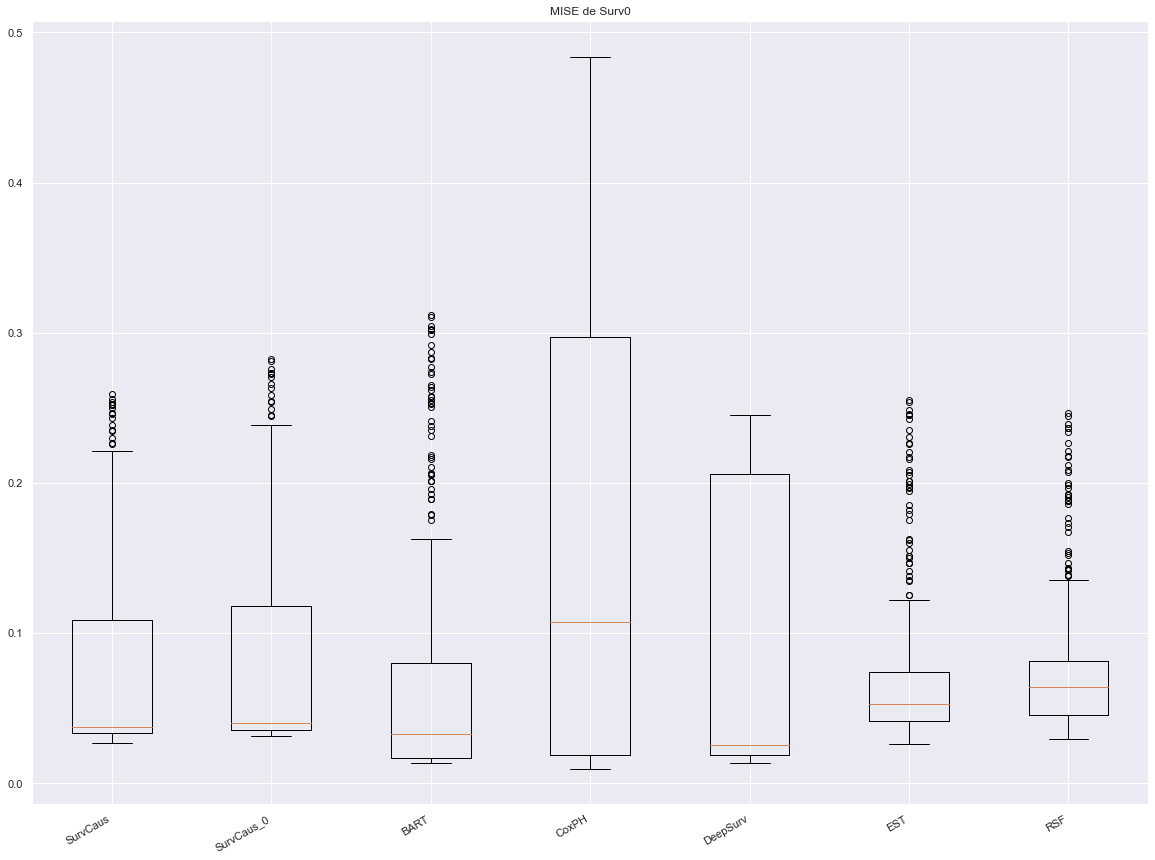

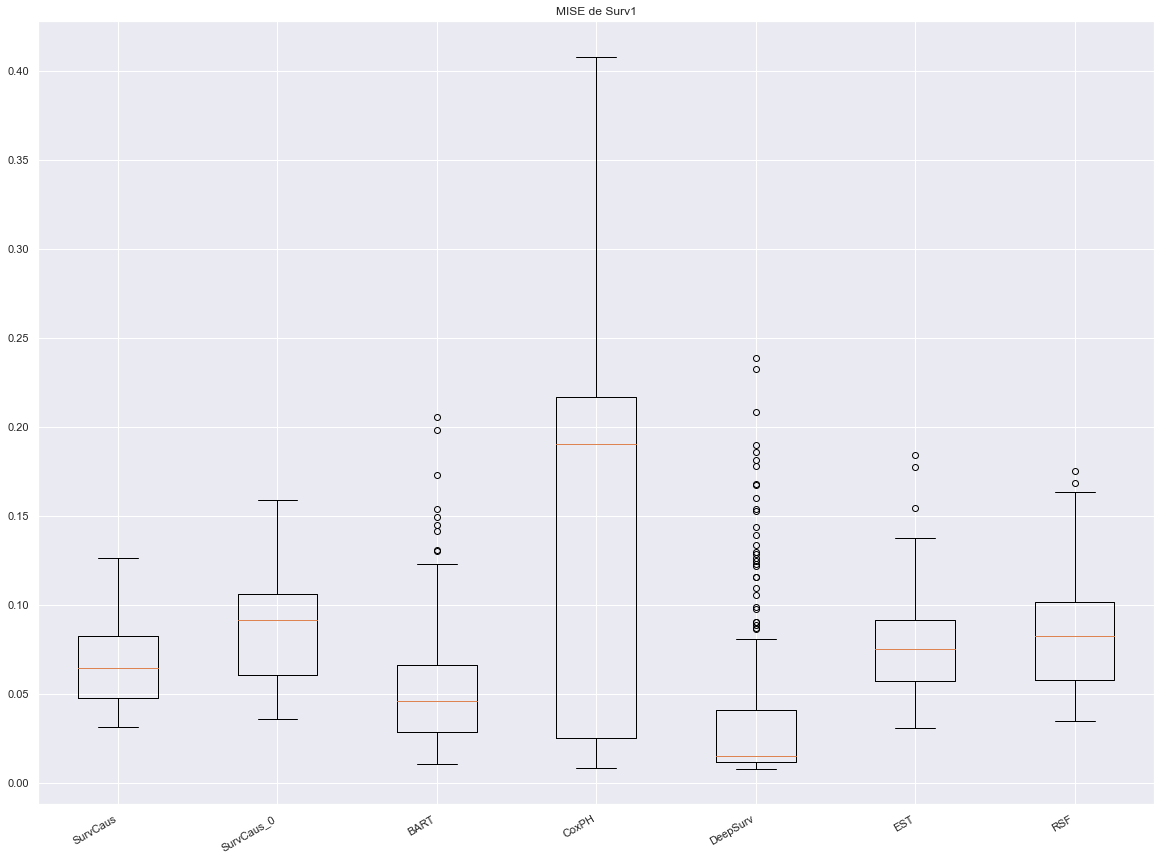

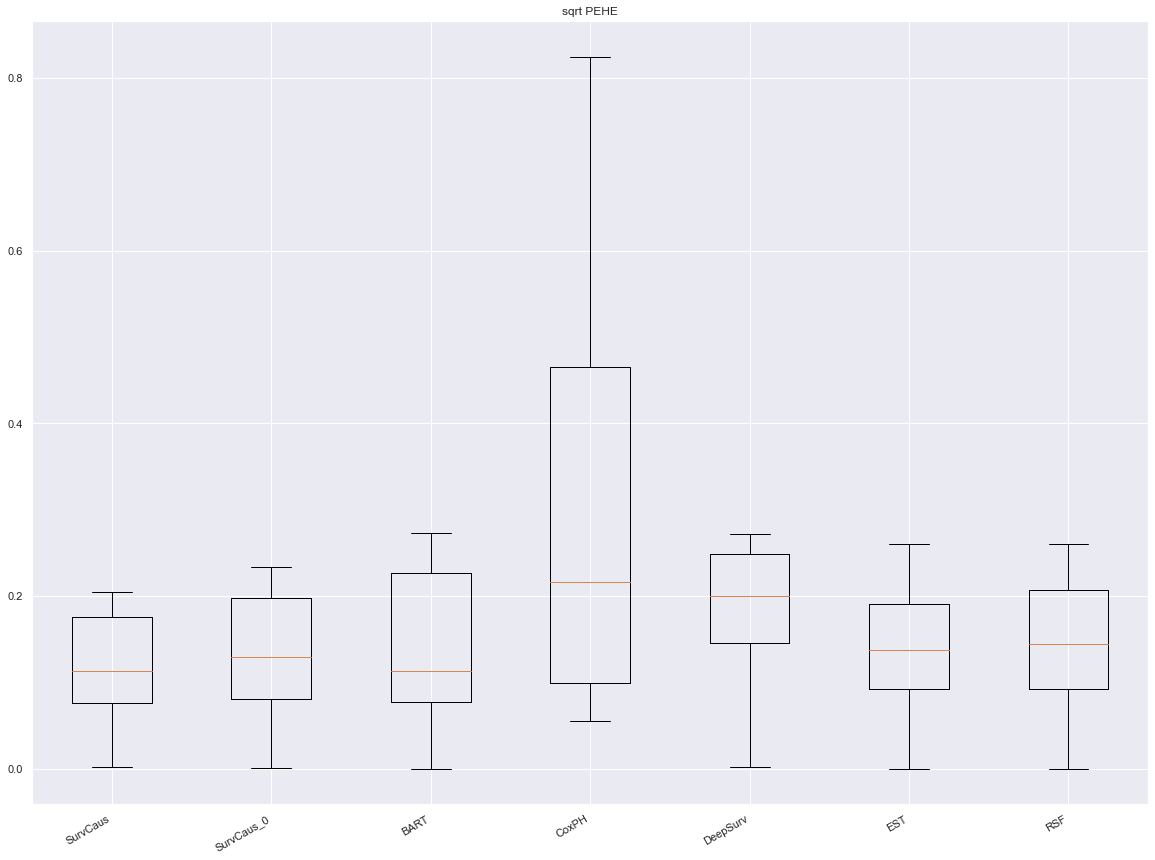

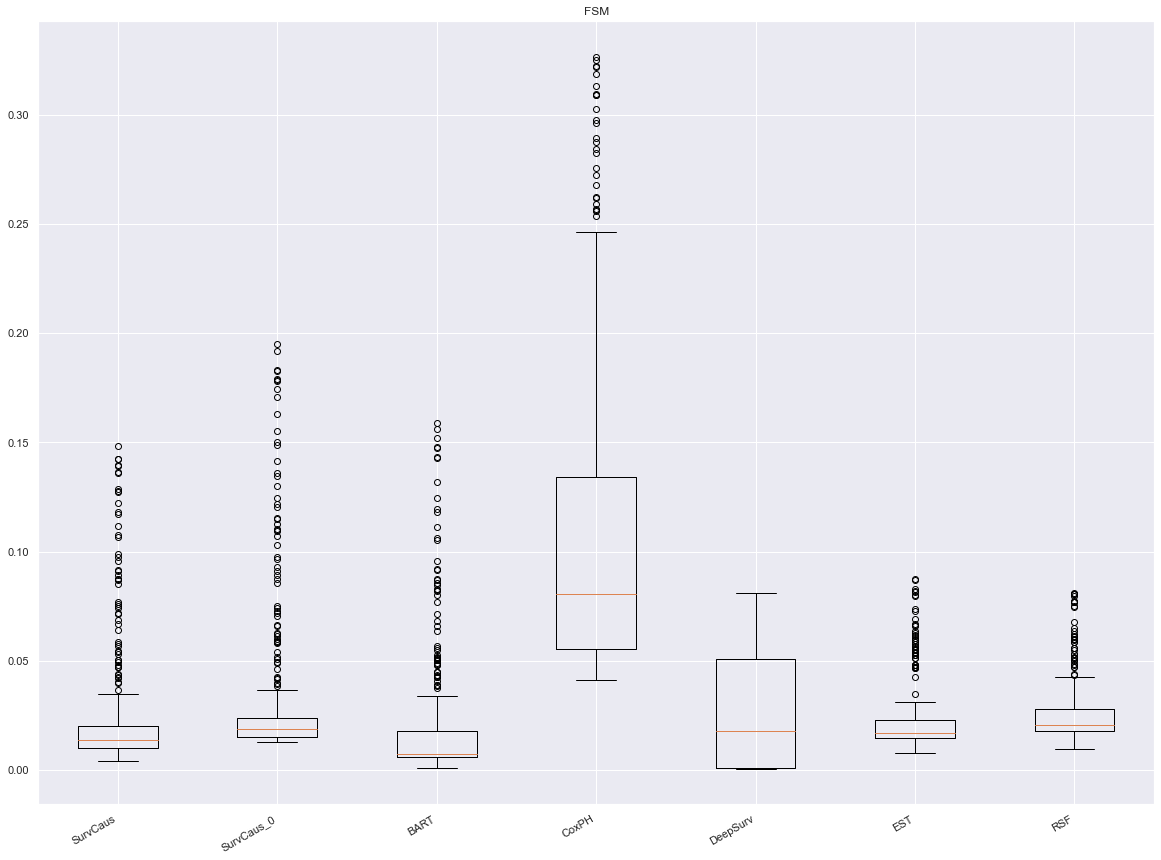

In [13]:
Ev.All_Results(list_models=list_models,
                        is_train=False,params_bart=p_bart_best)

# Benchmark

In [14]:
# Bilan of benchmark
nep.send_data(Ev.bilan_benchmark, "bilan_benchmark",num_run=0)
Ev.bilan_benchmark


,models,Mise0,Mise1,CATE,PEHE,FSM
0,SurvCaus,"(0.077, 0.064)","(0.065, 0.021)","(0.09, 0.029)","(0.12, 0.056)","(0.025, 0.03)"
1,SurvCaus_0,"(0.083, 0.07)","(0.084, 0.028)","(0.106, 0.018)","(0.134, 0.067)","(0.034, 0.039)"
2,BART,"(0.07, 0.079)","(0.049, 0.029)","(0.096, 0.064)","(0.141, 0.079)","(0.021, 0.031)"
3,CoxPH,"(0.171, 0.157)","(0.141, 0.108)","(0.268, 0.064)","(0.303, 0.236)","(0.107, 0.073)"
4,DeepSurv,"(0.097, 0.093)","(0.034, 0.041)","(0.115, 0.085)","(0.185, 0.076)","(0.025, 0.025)"
5,EST,"(0.072, 0.052)","(0.075, 0.023)","(0.096, 0.055)","(0.141, 0.063)","(0.023, 0.017)"
6,RSF,"(0.076, 0.048)","(0.081, 0.026)","(0.102, 0.052)","(0.146, 0.065)","(0.026, 0.015)"


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.001s...
[t-SNE] Computed neighbors for 600 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 0.011171
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.459183
[t-SNE] KL divergence after 1000 iterations: 0.137850


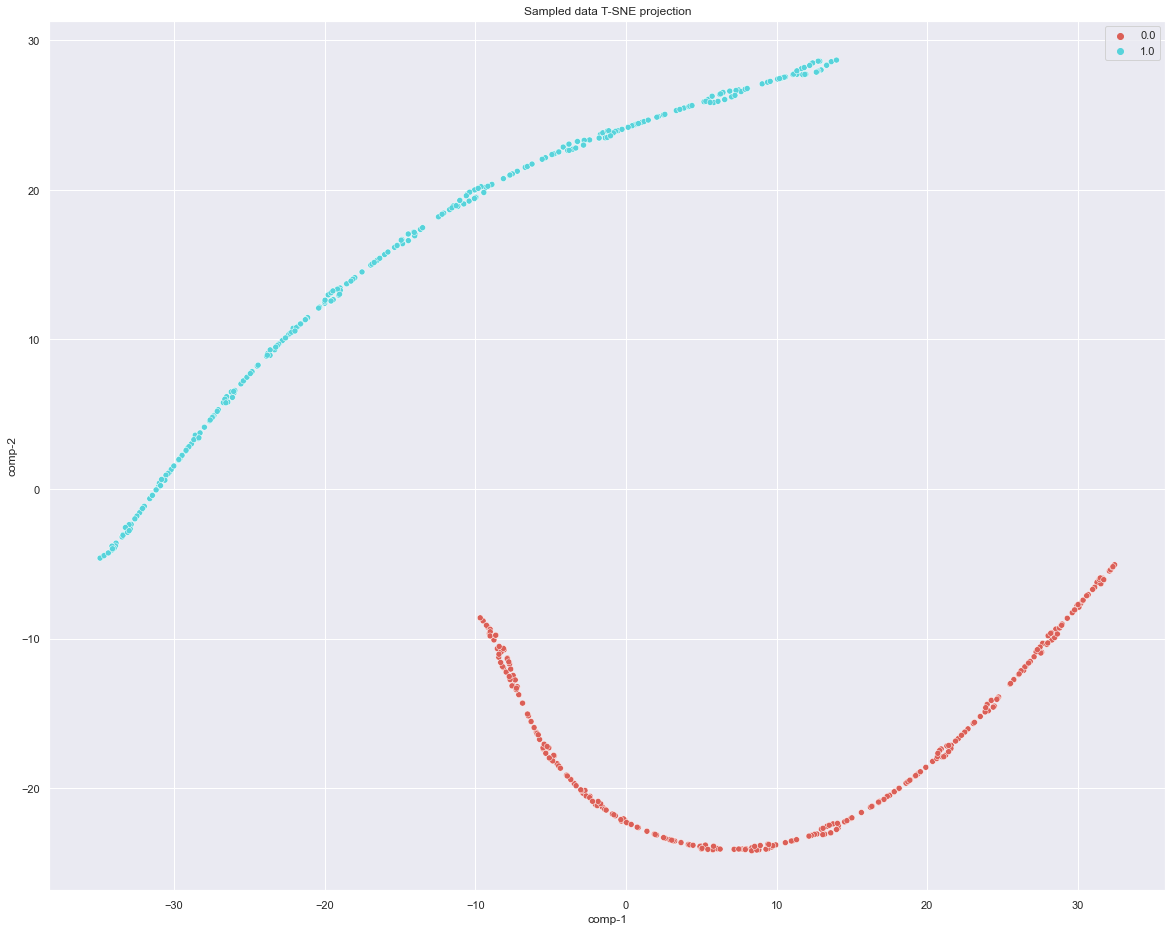

In [15]:
def get_repr(Ev):
    repr = Ev.SC.net.get_repr(torch.tensor(Ev.data.x_train))
    # repr to numpy
    repr = repr.detach().numpy()
    t = Ev.data.x_train[:,-1]
    return repr,t

def tsne_f(repr,t):
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(repr)
    d = pd.DataFrame()
    d["tt"] = t
    d["comp-1"] = z[:, 0]
    d["comp-2"] = z[:, 1]

    fig = plt.figure()
    sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
                palette=sns.color_palette("hls", 2),
                data=d).set(title="Sampled data T-SNE projection")
    plt.close()
    return fig
    
    
repres,t = get_repr(Ev)
tsne_survcaus_final = tsne_f(repres,t)

nep.send_plot(tsne_survcaus_final, "TSNE survcaus final",num_run=0)
tsne_survcaus_final

In [16]:
Ev.box_plot_cate
nep.send_plot(Ev.box_plot_cate, "box_plot_cate",num_run=0)


modifier S,
experiment
log - neptune
tables 
lancer :  wd, lin/nonlin, 
pas oublier brca !! 


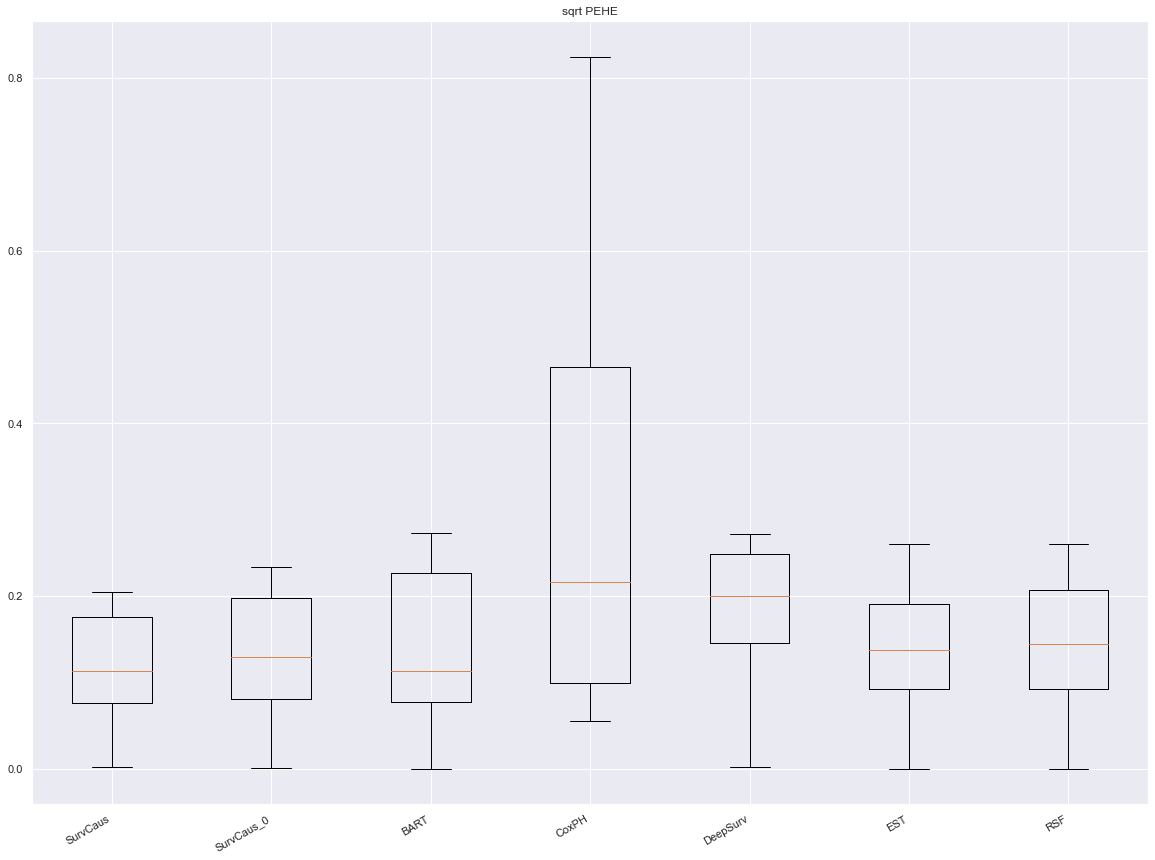

In [17]:
nep.send_plot(Ev.box_plot_pehe, "box_plot_pehe",num_run=0)
Ev.box_plot_pehe


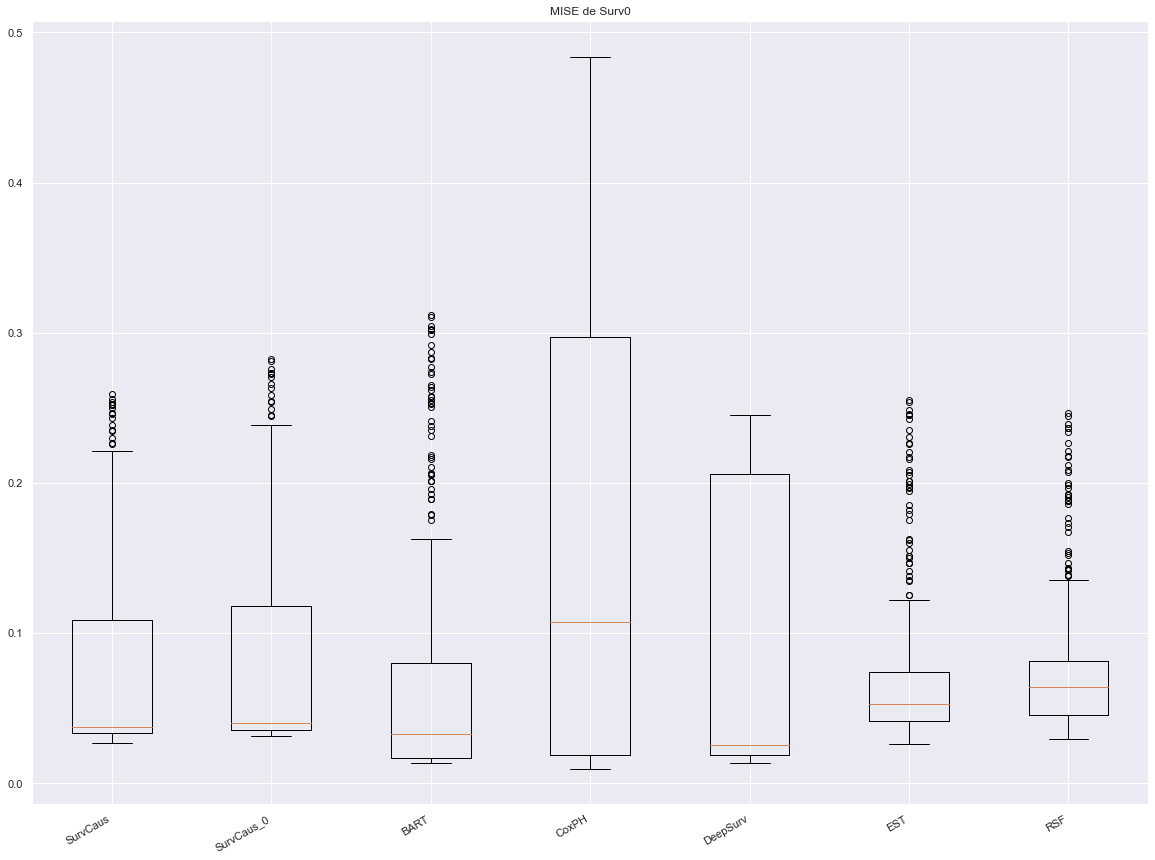

In [18]:
nep.send_plot(Ev.box_plot_surv0, "box_plot_surv0",num_run=0)
Ev.box_plot_surv0


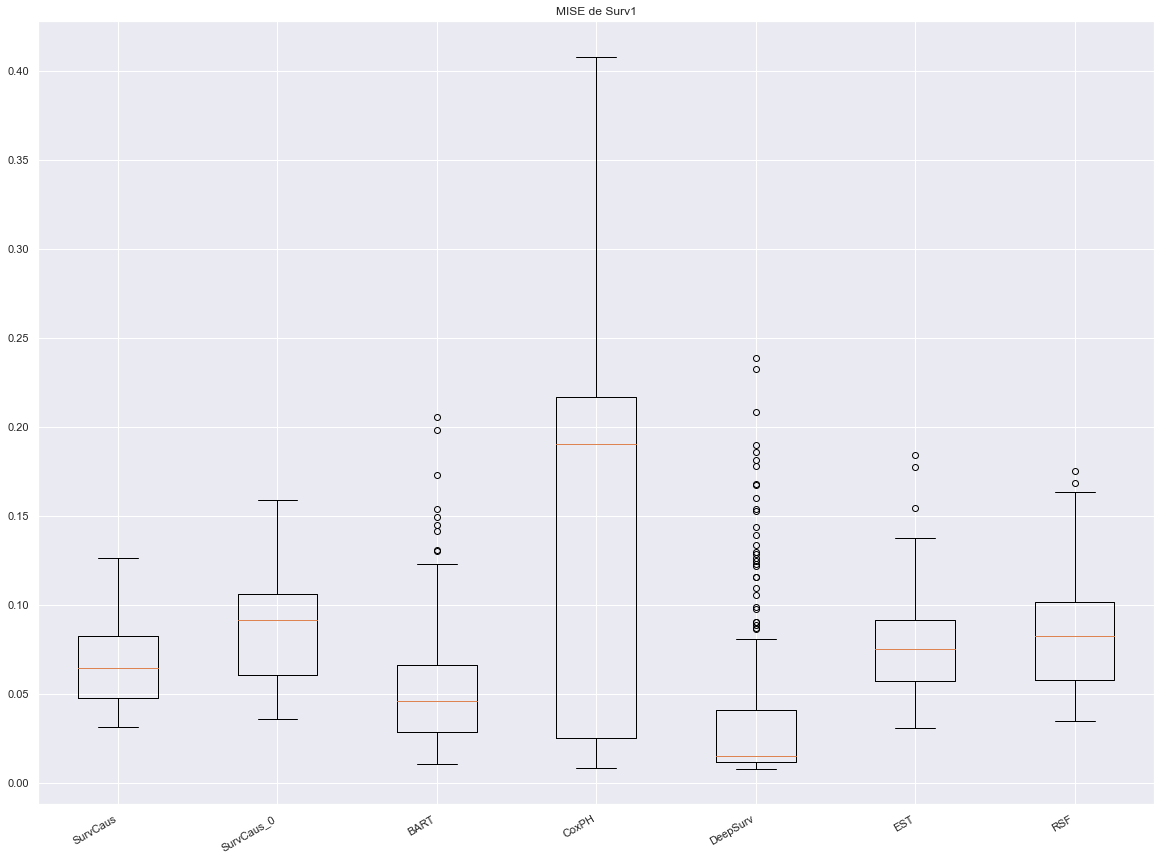

In [19]:
nep.send_plot(Ev.box_plot_surv1, "box_plot_surv1",num_run=0)
Ev.box_plot_surv1


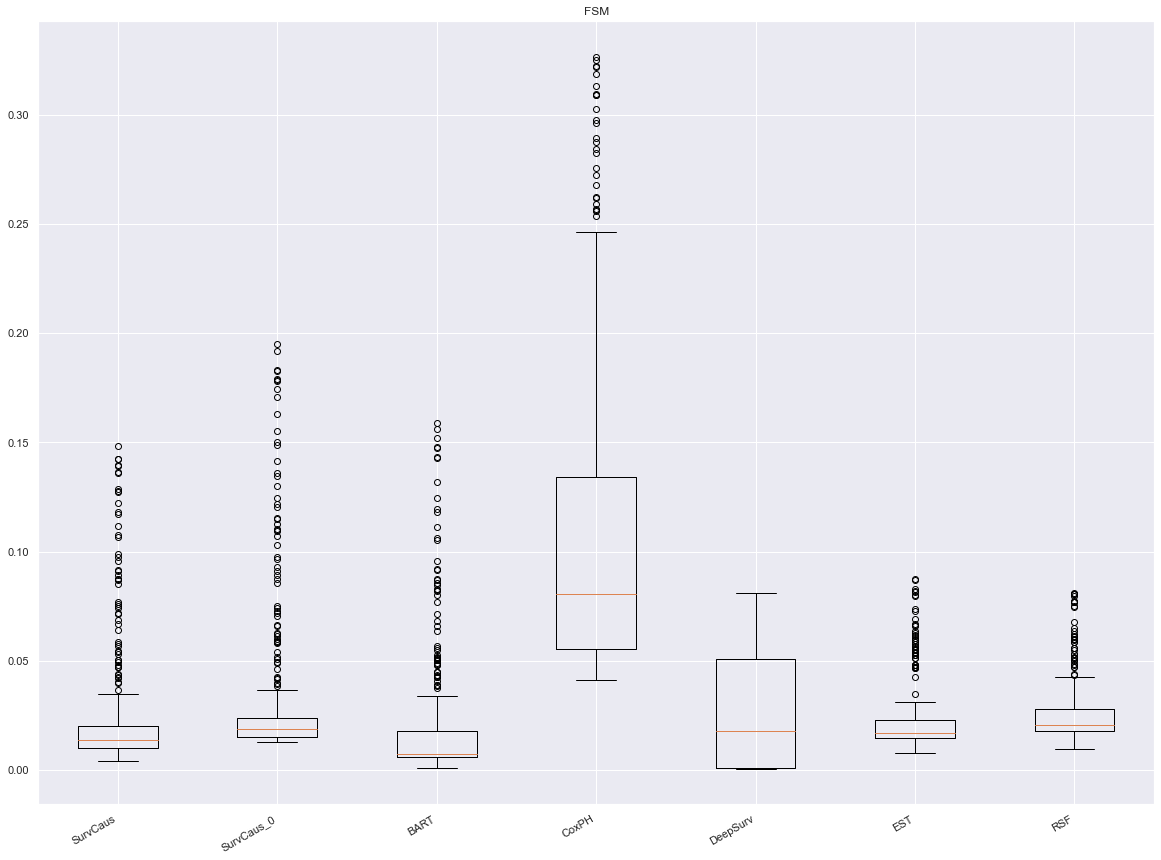

In [20]:
nep.send_plot(Ev.box_plot_FSM, "box_plot_FSM",num_run=0)
Ev.box_plot_FSM


(p_ours,p_bench) = (131, 131)
(p_ours,p_bench) = (131, 202)
(p_ours,p_bench) = (131, 87)
(p_ours,p_bench) = (131, 125)
(p_ours,p_bench) = (131, 246)
(p_ours,p_bench) = (131, 106)
(p_ours,p_bench) = (131, 189)


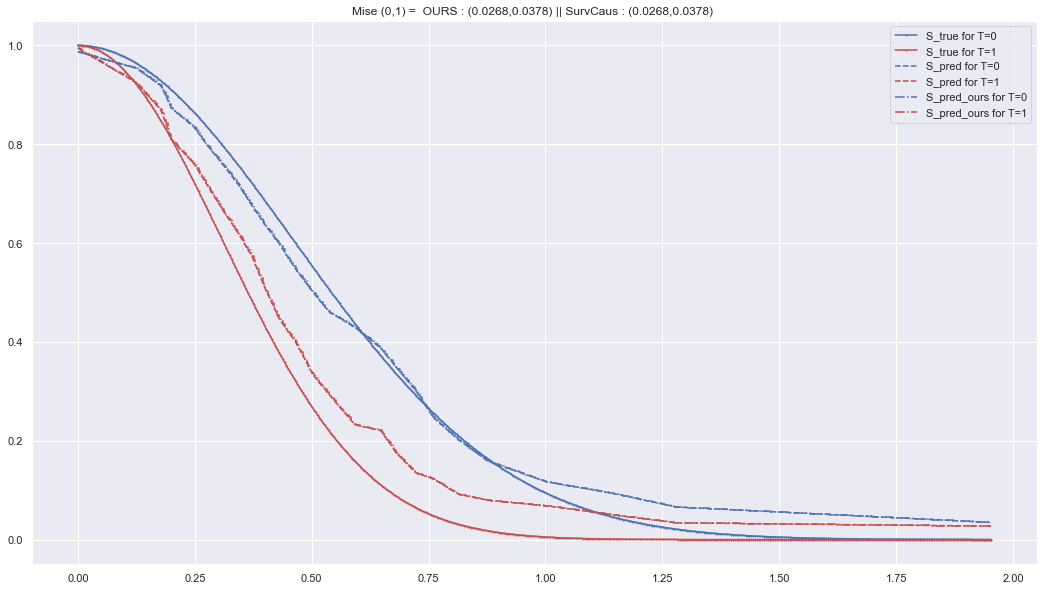

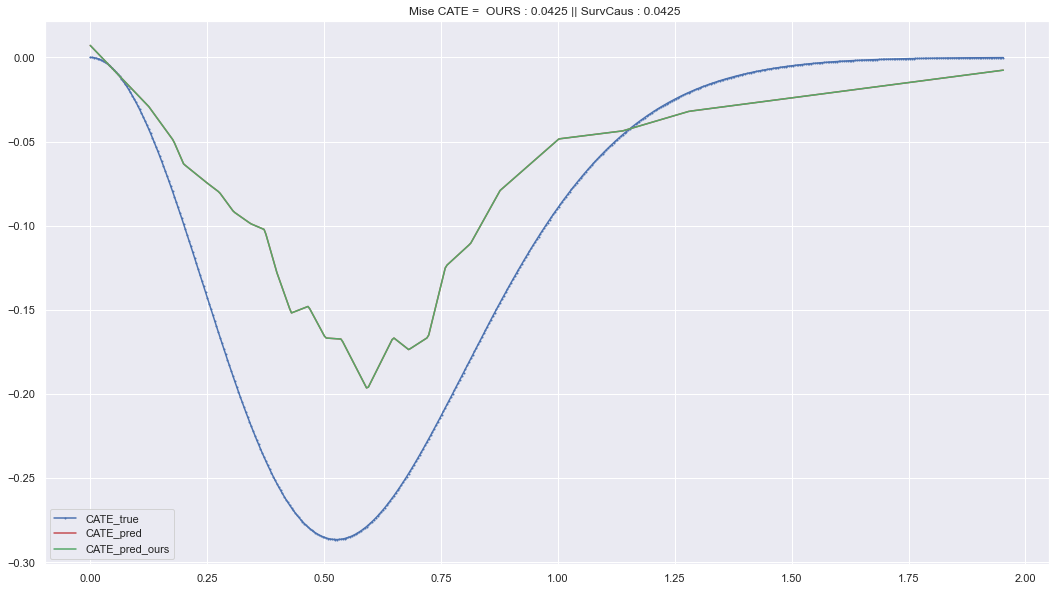

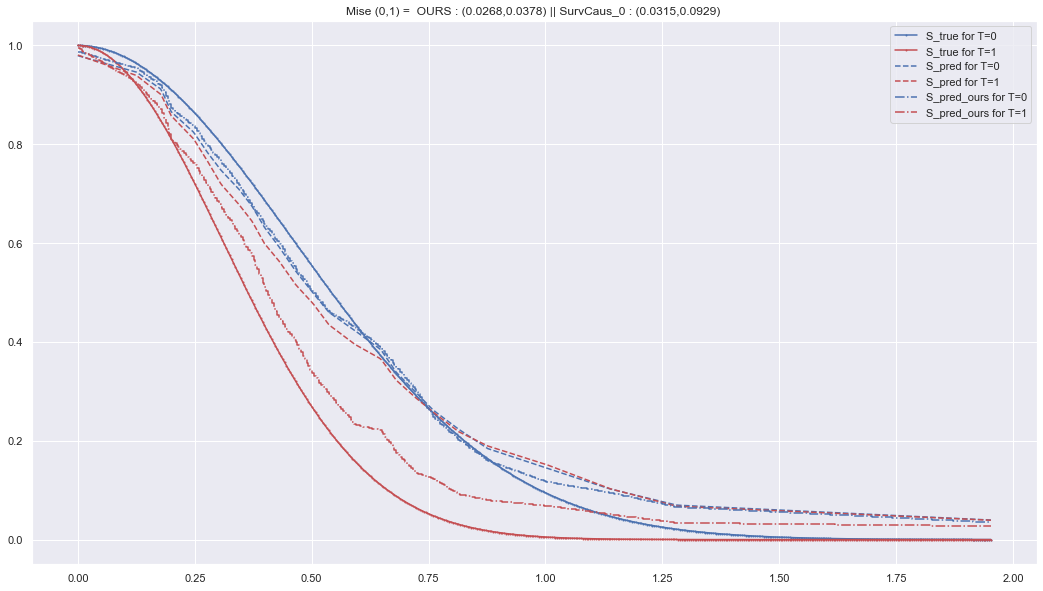

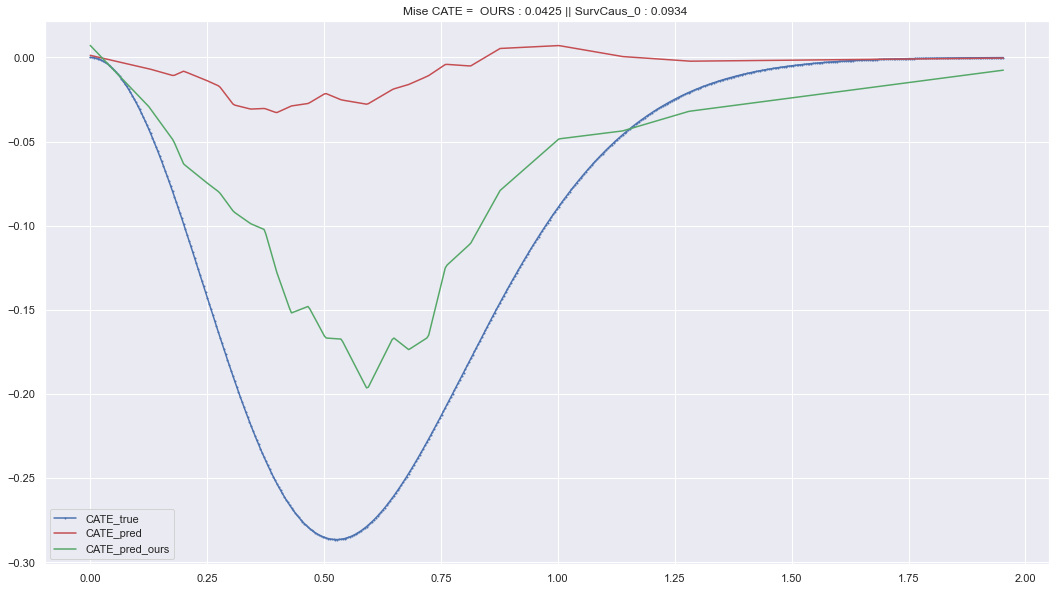

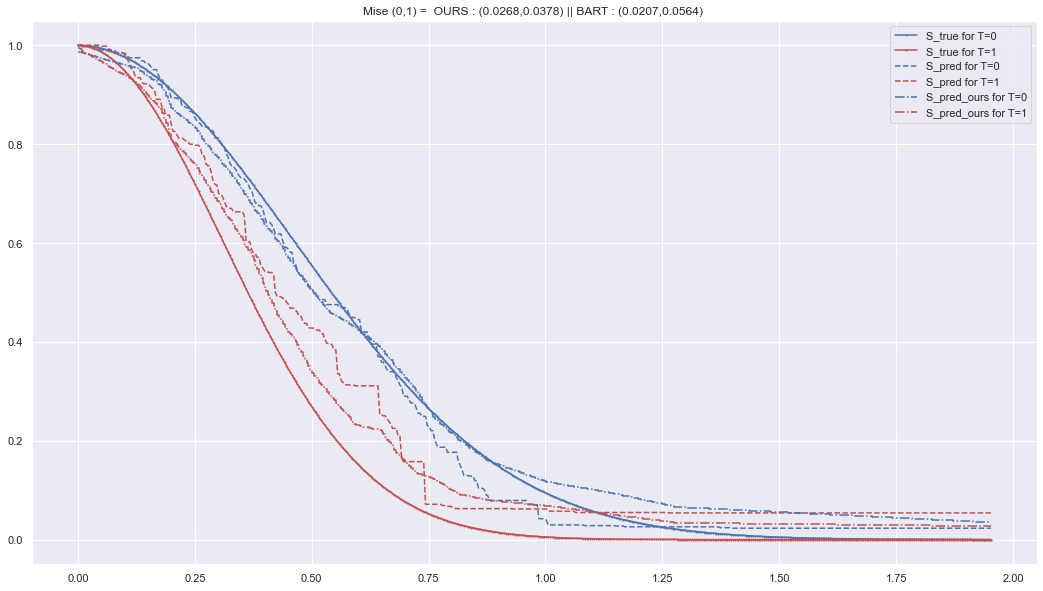

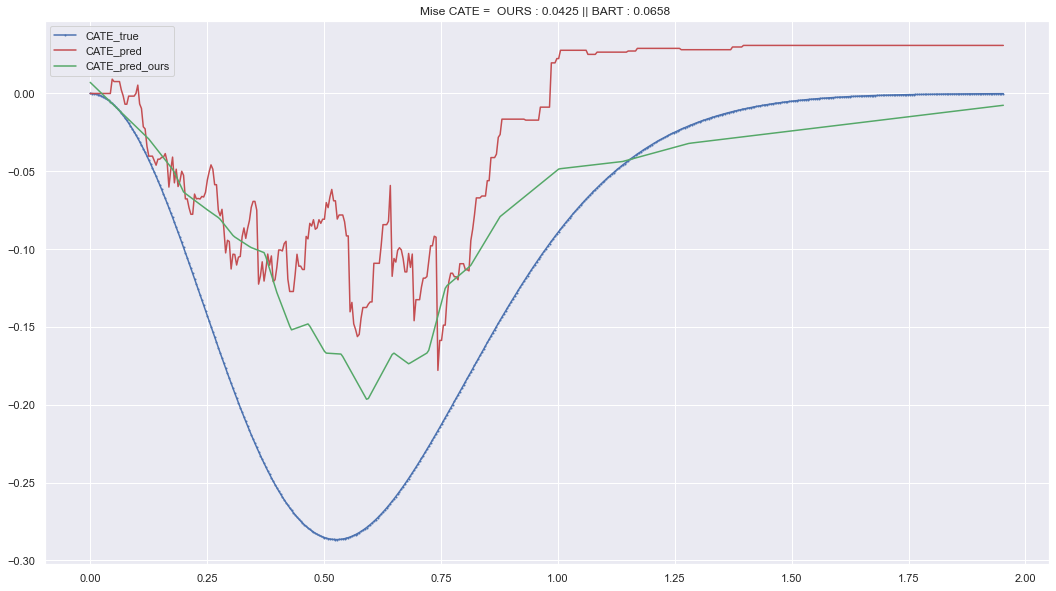

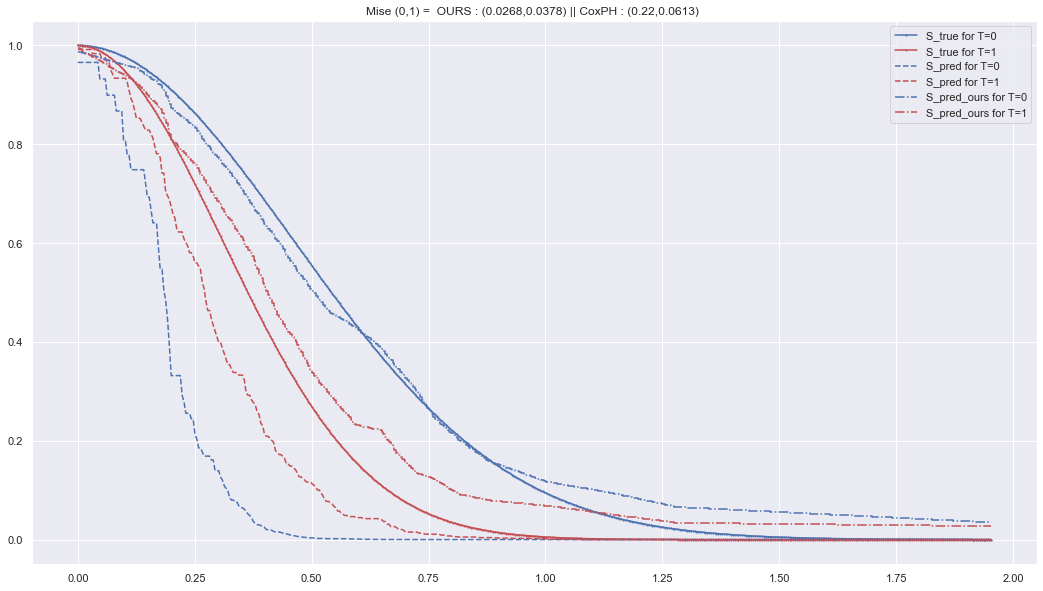

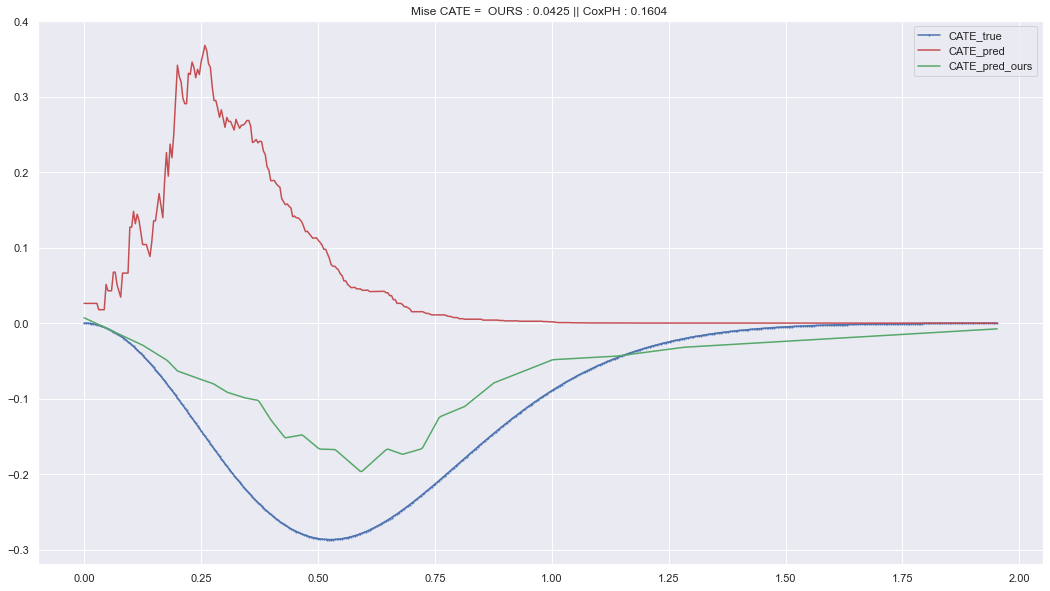

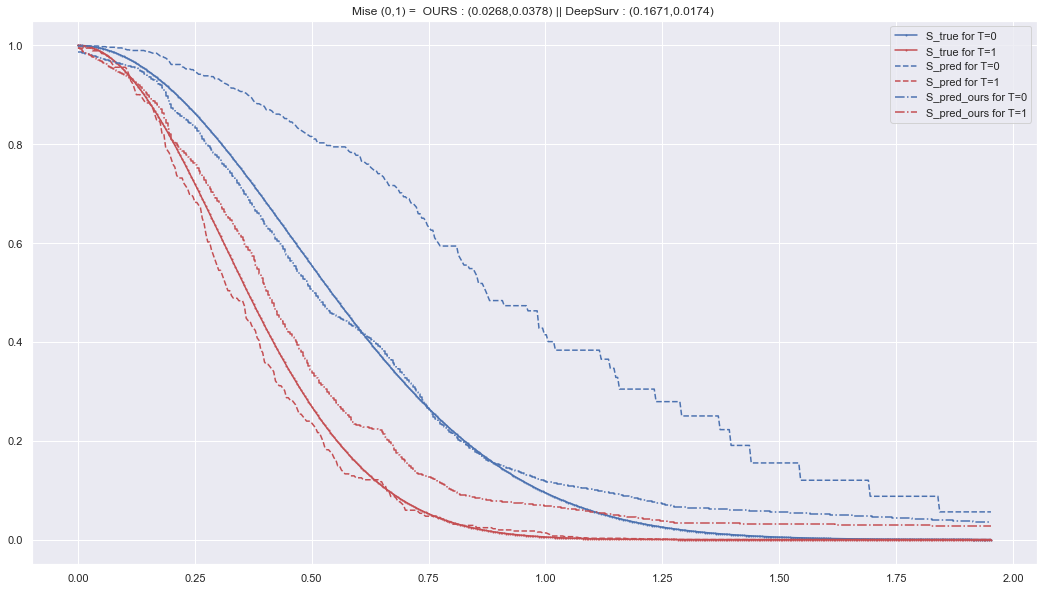

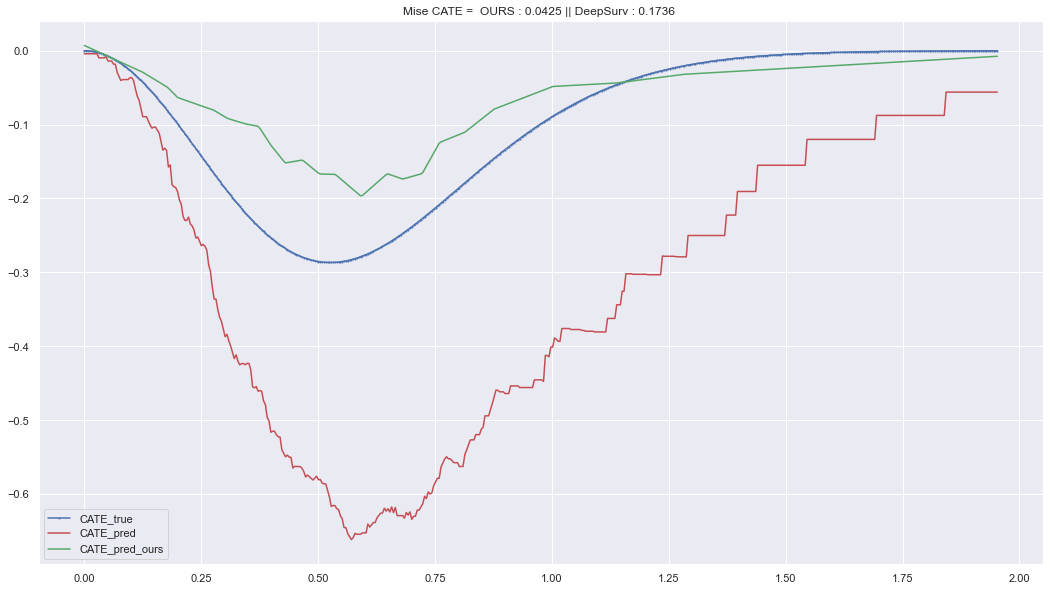

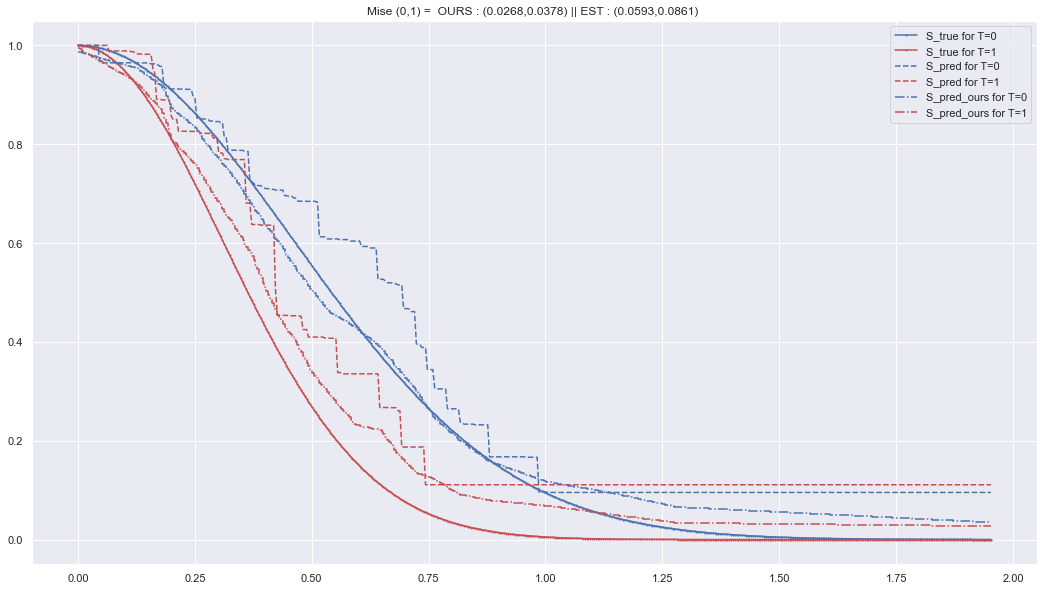

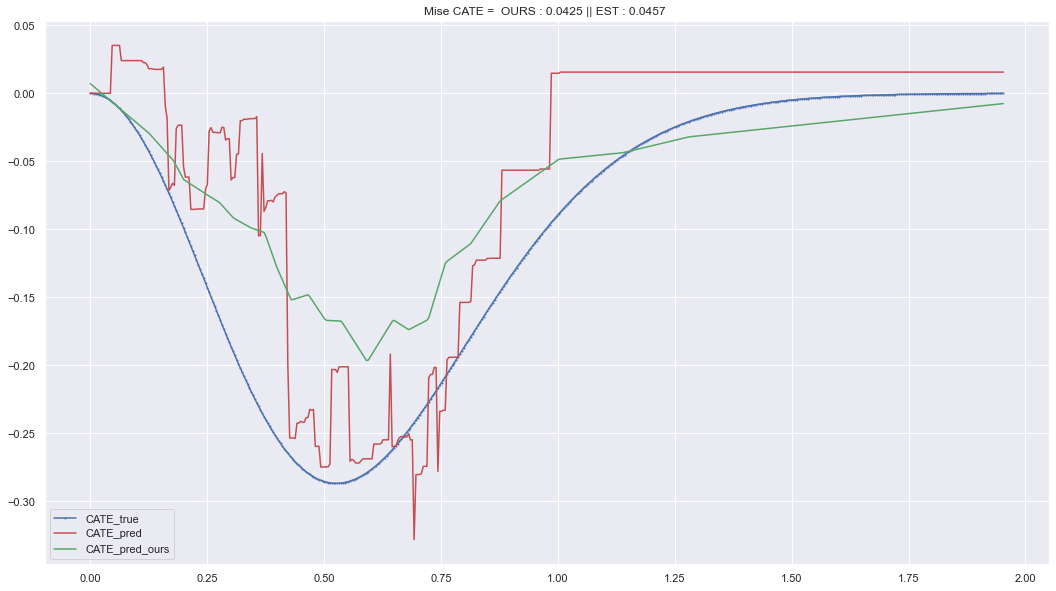

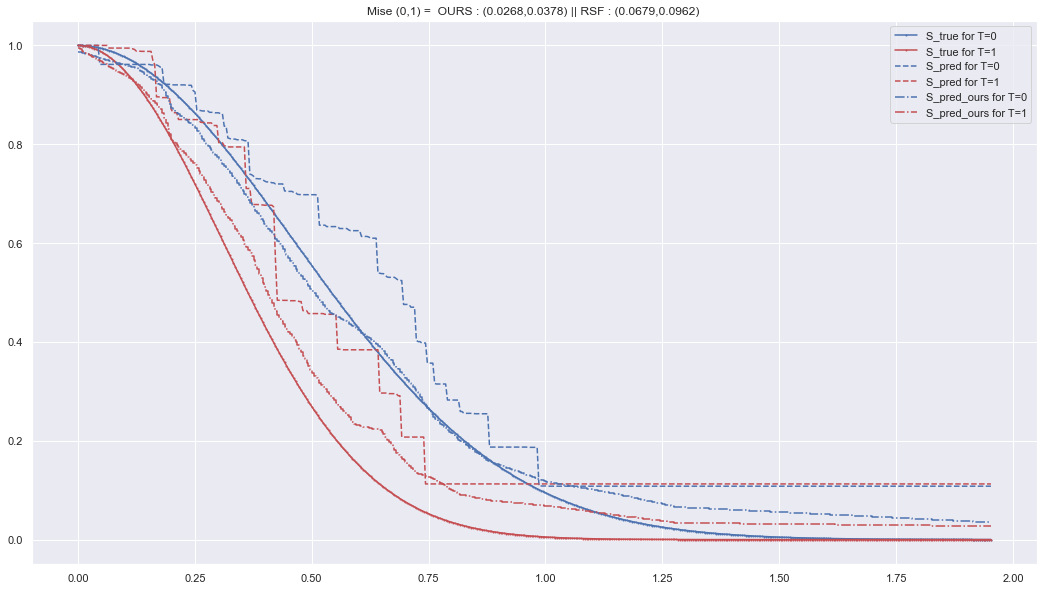

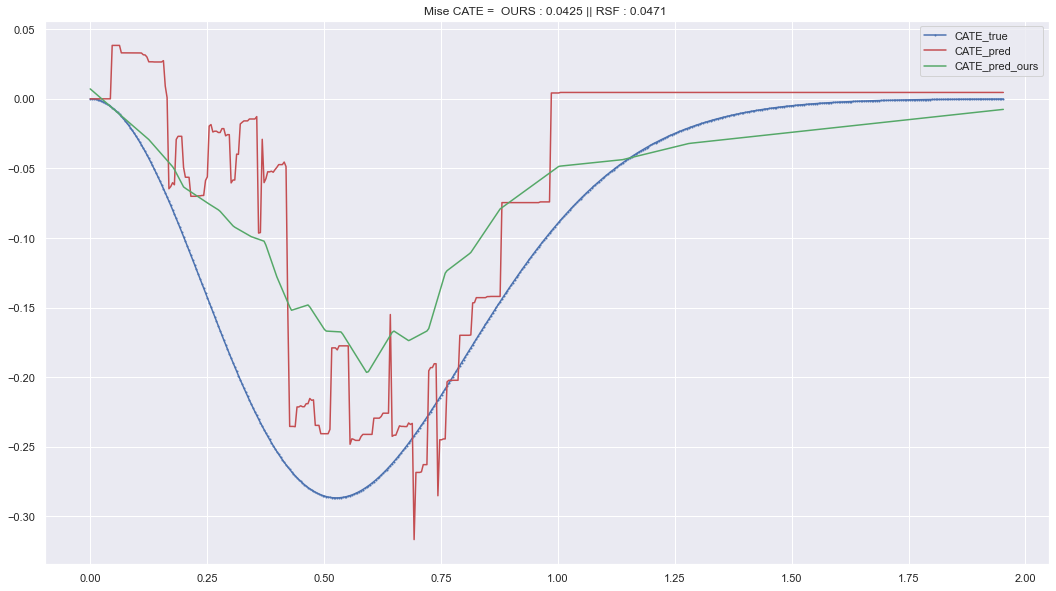

In [23]:

patient = 131
%matplotlib inline
d_q_all = {}
for model_name in Ev.list_models :
    fig_surv,fig_cate,d_q_model = plots(patient, Ev.d_list_models, model_name)
    d_q_all[model_name] = d_q_model
    nep.send_plot(fig_surv, "fig_surv_"+model_name,num_run=0)
    nep.send_plot(fig_cate, "fig_cate_"+model_name,num_run=0)


    



In [24]:

# dataframe of all the quantiles with the model name
df_q = pd.DataFrame(d_q_all)
nep.send_data(df_q, "df_q",num_run=0)
df_q


,SurvCaus,SurvCaus_0,BART,CoxPH,DeepSurv,EST,RSF
p,"[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]"
t*_0 true,"[0.99, 0.77, 0.62, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.62, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.62, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.62, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.62, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.62, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.62, 0.54, 0.35, 0.21]"
t*_0 pred,"[1.1, 0.76, 0.63, 0.5, 0.32, 0.19]","[1.15, 0.77, 0.63, 0.5, 0.31, 0.18]","[0.87, 0.74, 0.63, 0.5, 0.34, 0.2]","[0.32, 0.24, 0.2, 0.18, 0.11, 0.06]","[1.69, 1.29, 1.01, 0.87, 0.63, 0.36]","[0.99, 0.82, 0.72, 0.69, 0.37, 0.25]","[1.01, 0.86, 0.73, 0.7, 0.37, 0.25]"
dif_0,0.050332,0.070475,0.053541,0.431258,0.432493,0.078528,0.089629
t*_1 true,"[0.66, 0.51, 0.42, 0.36, 0.23, 0.14]","[0.66, 0.51, 0.42, 0.36, 0.23, 0.14]","[0.66, 0.51, 0.42, 0.36, 0.23, 0.14]","[0.66, 0.51, 0.42, 0.36, 0.23, 0.14]","[0.66, 0.51, 0.42, 0.36, 0.23, 0.14]","[0.66, 0.51, 0.42, 0.36, 0.23, 0.14]","[0.66, 0.51, 0.42, 0.36, 0.23, 0.14]"
t*_1 pred,"[0.8, 0.58, 0.47, 0.4, 0.25, 0.15]","[1.15, 0.77, 0.59, 0.48, 0.29, 0.18]","[0.74, 0.65, 0.53, 0.42, 0.28, 0.16]","[0.51, 0.39, 0.3, 0.27, 0.18, 0.11]","[0.66, 0.48, 0.39, 0.32, 0.21, 0.13]","[0.74, 0.68, 0.53, 0.42, 0.32, 0.17]","[0.74, 0.68, 0.56, 0.43, 0.36, 0.17]"
dif_1,0.069642,0.243653,0.086217,0.102307,0.025495,0.1,0.113725
dif,0.059987,0.157064,0.069879,0.266782,0.228994,0.089264,0.101677
